In [1]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from quantecon import LQ
from DynLinEcon import DLE
from math import sqrt
%matplotlib inline

## Hansen-Sargent Invertibility Example (Chapter 8 Appendix E)

We consider the following version of Hall's (1978) model in which the endowment process is the sum of two orthogonal autoregressive processes:

** Preferences **
$$ -\frac{1}{2}\mathbb{E}\sum_{t=0}^\infty \beta^t[(c_t - b_t)^2 + l_t^2]|J_0 $$
$$s_t = c_t$$
$$b_t = U_bz_t$$

** Technology **
$$ c_t + i_t = \gamma k_{t-1} + d_t$$
$$ k_t = \delta_k k_{t-1} + i_t $$
$$ g_t = \phi_1 i_t \, , \phi_1 > 0 $$
$$ g_t \cdot g_t = l_t^2 $$

** Information **
$$ z_{t+1} = 
\left[ {\begin{array}{cccccc}
   1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0.9 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0
   \end{array} } 
   \right]
   z_t + 
    \left[ {\begin{array}{cc}
   0 & 0 \\ 1 & 0 \\ 0 & 4 \\ 0 & 0 \\ 0 & 0 \\ 0 & 0
   \end{array} } 
   \right]
   w_{t+1} $$
   
   $$ U_b = 
   \left[ {\begin{array}{cccccc}
   30 & 0 & 0 & 0 & 0 & 0
   \end{array} } 
   \right]$$
   $$U_d = 
   \left[ {\begin{array}{cccccc}
   5 & 1 & 1 & 0.8 & 0.6 & 0.4 \\ 0 & 0 & 0 & 0 & 0 & 0
   \end{array} } 
   \right]$$
   
The preference shock is constant at 30, while the endowment process is the sum of a constant and two orthogonal processes. Specifically:
$$ d_t = 5 + d_{1t} + d_{2t} $$
$$ d_{1t} = 0.9d_{1t-1} + w_{1t} $$
$$ d_{2t} = 4w_{2t} + 0.8(4w_{2t-1})+ 0.6(4w_{2t-2})+ 0.4(4w_{2t-3}) $$

$d_{1t}$ is a first-order AR process, while $d_{2t}$ is a third order pure moving average process.

In [2]:
gamma1 = 0.05
gamma = np.array([[gamma1],[0]])
phic = np.array([[1],[0]])
phig = np.array([[0],[1]])
phi1 = 0.00001
phii = np.array([[1],[-phi1]])
deltak = np.array([[1]])
thetak = np.array([[1]])
beta = np.array([[1/1.05]])
llambda = np.array([[0]])
pih = np.array([[1]])
deltah = np.array([[.9]])
thetah = np.array([[1]])-deltah
ud = np.array([[5,1,1,0.8,0.6,0.4],[0,0,0,0,0,0]])
a22 = np.zeros((6,6))
a22[[0, 1, 3, 4, 5], [0, 1, 2, 3, 4]] = np.array([1.0, 0.9, 1.0, 1.0, 1.0]) #Chase's great trick
c2= np.zeros((6,2))
c2[[1,2],[0,1]] = np.array([1.0,4.0])
ub=np.array([[30,0,0,0,0,0]])
x0 = np.array([[5],[150],[1],[0],[0],[0],[0],[0]])

Info1 = (a22,c2,ub,ud)
Tech1 = (phic,phig,phii,gamma,deltak,thetak)
Pref1 = (beta,llambda,pih,deltah,thetah)

In [3]:
Econ1 = DLE(Info1, Tech1, Pref1)

We define the household's net of interest deficit as $c_t - d_t$. Hall's model imposes "expected present-value budget balance" in the sense that $$\mathbb{E}\sum_{j=0}^\infty \beta^j (c_{t+j} - d_{t+j})|J_t = \beta^{-1}k_{t-1} \, \forall t $$

If we define the moving average representation of $(c_t, c_t - d_t)$ in terms of the $w_t$s to be:

$$ \left[ {\begin{array}{c}
   c_t \\ c_t - d_t
   \end{array} } 
   \right]  = \left[ {\begin{array}{c}
   \sigma_1(L) \\ \sigma_2(L)
   \end{array} } 
   \right] w_t$$
   
then Hall's model imposes the restriction $\sigma_2(\beta) = [0\,\,\,0]$.

The agents in this model see histories of both components of the endowment process $d_{1t}$ and $d_{2t}$. The econometrician has data on the history of the pair $[c_t,d_t]$, but not directly on the history of $w_t$. The econometrician obtains a Wold representation for the process $[c_t,c_t-d_t]$:

$$ \left[ {\begin{array}{c}
   c_t \\ c_t - d_t
   \end{array} } 
   \right]  = \left[ {\begin{array}{c}
   \sigma_1^*(L) \\ \sigma_2^*(L)
   \end{array} } 
   \right] u_t$$

The Appendix explains why the impulse response functions in the Wold representation estimated by the econometrician do not resemble the impulse response functions that depict the response of consumption and the deficit to innovations to agents' information.

In particular, $\sigma_2(\beta) = [0\,\,\,0]$ implies that the history of $u_t$s spans a *smaller* linear space than does the history of $w_t$s. This means that $u_t$ will typically be a distributed lag of $w_t$ that is not concentrated at zero lag:

$$ u_t = \sum_{j=0}^\infty \alpha_j w_{t-j} $$

Thus, the econometrician's news $u_t$ potentially responds belatedly to agents' news $w_t$.

We will construct the Figures from Chapter 8 Appendix E of HS2013 to illustrate these ideas:

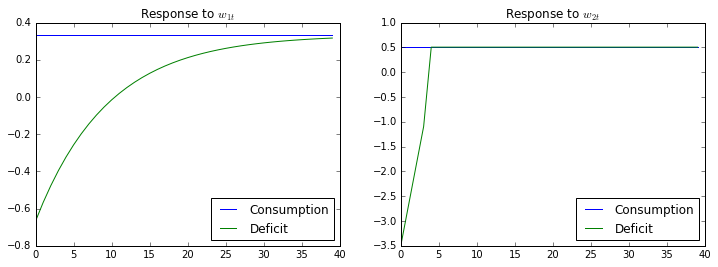

In [4]:
# This is Fig 8.E.1 from p.188 of HS2013

Econ1.irf(ts_length=40,shock=None)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Econ1.c_irf,label='Consumption')
plt.plot(Econ1.c_irf-Econ1.d_irf[:,0].reshape(40,1),label='Deficit')
plt.legend(loc='Best')
plt.title('Response to $w_{1t}$')

shock2 = np.array([[0],[1]])
Econ1.irf(ts_length=40,shock=shock2)

plt.subplot(122)
plt.plot(Econ1.c_irf,label='Consumption')
plt.plot(Econ1.c_irf-Econ1.d_irf[:,0].reshape(40,1),label='Deficit')
plt.legend(loc='Best')
plt.title('Response to $w_{2t}$')

The above figure displays the impulse response of consumption and the deficit to the endowment innovations.

Consumption displays the characteristic "random walk" response with respect to each innovation. Each endowment innovation leads to a temporary surplus followed by a permanent net-of-interest deficit.

The temporary surplus just offsets the permanent deficit in terms of expected present value.

In [5]:
G_HS = np.vstack([Econ1.Sc,Econ1.Sc-Econ1.Sd[0,:].reshape(1,8)])
H_HS = 1e-8 * np.eye(2) #Set very small so there is no measurement error
LSS_HS = qe.LinearStateSpace(Econ1.A0, Econ1.C, G_HS, H_HS)

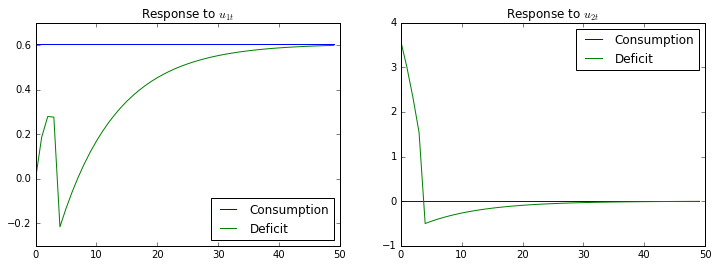

In [6]:
HS_kal = qe.Kalman(LSS_HS)
w_lss = HS_kal.whitener_lss() 
ma_coefs = HS_kal.stationary_coefficients(50, 'ma')

# This is Fig 8.E.2 from p.189 of HS2013

ma_coefs = ma_coefs
jj = 50
y1_w1 = np.empty(jj)
y2_w1 = np.empty(jj)
y1_w2 = np.empty(jj)
y2_w2 = np.empty(jj)

for t in range(jj):
    y1_w1[t] = ma_coefs[t][0, 0]
    y1_w2[t] = ma_coefs[t][0, 1]
    y2_w1[t] = ma_coefs[t][1, 0]
    y2_w2[t] = ma_coefs[t][1, 1]
    
# This scales the impulse responses to match those in the book
y1_w1 = sqrt(HS_kal.stationary_innovation_covar()[0,0])*y1_w1
y2_w1 = sqrt(HS_kal.stationary_innovation_covar()[0,0])*y2_w1
y1_w2 = sqrt(HS_kal.stationary_innovation_covar()[1,1])*y1_w2
y2_w2 = sqrt(HS_kal.stationary_innovation_covar()[1,1])*y2_w2

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(y1_w1,label='Consumption')
plt.plot(y2_w1,label='Deficit')
plt.legend(loc='Best')
plt.title('Response to $u_{1t}$')
plt.subplot(122)
plt.plot(y1_w2,label='Consumption')
plt.plot(y2_w2,label='Deficit')
plt.legend(loc='Best')
plt.title('Response to $u_{2t}$')

The above figure displays the impulse response of consumption and the deficit to the innovations in the econometrician's Wold representation.

Consumption responds only to the first innovation. This is indicative of the Granger causality imposed on the $[c_t, c_t - d_t]$ process by Hall's model: consumption Granger causes $c_t - d_t$, with no reverse causality.

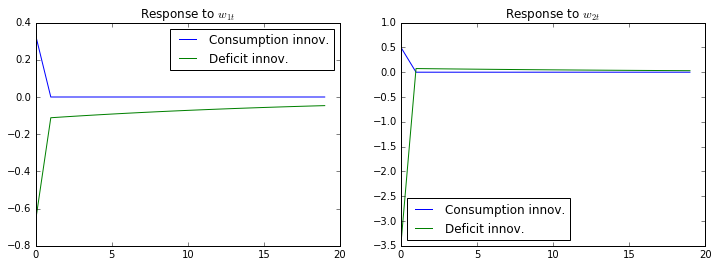

In [7]:
# This is Fig 8.E.3 from p.189 of HS2013

jj = 20
irf_wlss = w_lss.impulse_response(jj)
ycoefs = irf_wlss[1]
# Pull out the shocks
a1_w1 = np.empty(jj)
a1_w2 = np.empty(jj)
a2_w1 = np.empty(jj)
a2_w2 = np.empty(jj)

for t in range(jj):
    a1_w1[t] = ycoefs[t][0, 0]
    a1_w2[t] = ycoefs[t][0, 1]
    a2_w1[t] = ycoefs[t][1, 0]
    a2_w2[t] = ycoefs[t][1, 1]

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(a1_w1,label='Consumption innov.')
plt.plot(a2_w1,label='Deficit innov.')
plt.title('Response to $w_{1t}$')
plt.legend(loc='Best')
plt.subplot(122)
plt.plot(a1_w2,label='Consumption innov.')
plt.plot(a2_w2,label='Deficit innov.')
plt.legend(loc='Best')
plt.title('Response to $w_{2t}$')

The final figure displays the impulse responses of $u_t$ to $w_t$, as depicted in: $$ u_t = \sum_{j=0}^\infty \alpha_j w_{t-j} $$

While the responses of the innovations to consumption are concentrated at lag zero for both components of $w_t$, the responses of the innovations to $(c_t - d_t)$ are spread over time (especially in response to $w_{1t}$). 

Thus, the innovations to $(c_t - d_t)$ as revealed by the vector autoregression depend on what to economic agents is "old news".